In [4]:
import numpy as np
import pandas as pd

from sympy.solvers import solve
from sympy import Symbol
import scipy.stats as sstats

from utils_practice import SimulateData, joyplot

import matplotlib.pyplot as plt
from matplotlib import cm

In [5]:
def plot_RTs_per_SSD(sim_data):

    SSDs = sim_data.SSD.unique()
    SSDs = [i for i in SSDs if i==i]
    SSDs.sort()
    RT_dist_dict = {ssd: [] for ssd in SSDs}
    for ssd in SSDs:
        RT_dist_dict[ssd] = sim_data.query(
            f"SSD == {ssd}"
        ).stopRT.values

    go_RTs = sim_data.query(
            f"condition == 'go'"
        ).goRT.values

    RT_dist_dict.update({-1:go_RTs})

    max_RT = np.nanmax([np.nanmax(RT_dist_dict[key]) for key in RT_dist_dict])

    bins = np.arange(0, max_RT, 5)

    RT_by_SSD_df = pd.DataFrame({ key:pd.Series(value) for key, value in RT_dist_dict.items()})
    RT_by_SSD_df = RT_by_SSD_df.reindex(sorted(RT_by_SSD_df.columns), axis=1)
    rt_by_SSD_melt = RT_by_SSD_df.melt(value_vars=RT_by_SSD_df.columns, var_name='SSD', value_name='RT')

    fig, axes = joyplot(rt_by_SSD_melt, by="SSD", column="RT", range_style='own',
                        grid='y',
                        linewidth=1, legend=False, figsize=(8,8),
                        title="RT Distribution by trial type / SSD",
                        bins=bins,
                        hist=True,
                        density=True,
                        ylim='own',
                        colormap=cm.autumn_r,
                        fade=True)
    plt.show()
    plt.close()

# Simulate 1 subject

In [29]:
params = {'mu_go': .2,
        'mu_stop': .55,
        'noise_go': 1.125,
        'noise_stop': 1.5,
        'threshold':100,
        'nondecision_go':50,
        'nondecision_stop':50,
        'inhibition_interaction':.5, 
        'SSDs':[150, 200, 250, 300],
        'n_trials':3000,
        'max_time':3000,
        'p_trigger_fail': 0,
        'p_guess': 0,
        'guess_function': lambda x: np.random.uniform(200, 400, x),
       }
simulator = SimulateData()
sim_data = simulator.simulate(params)
sim_data.query('condition=="go"')['goRT'].mean()

535.452

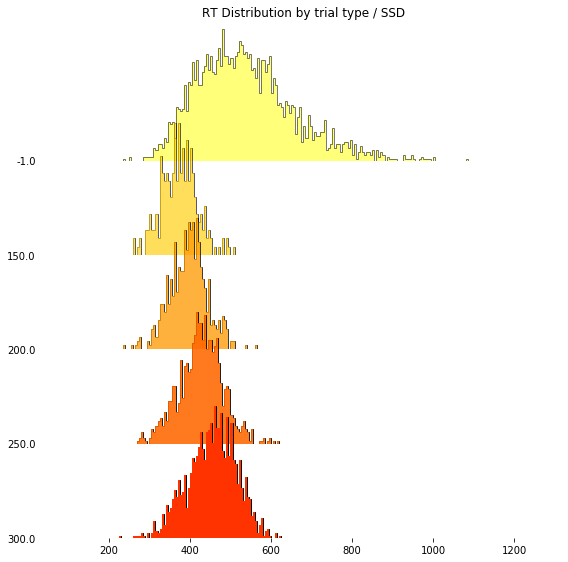

In [30]:
plot_RTs_per_SSD(sim_data)

In [47]:
params = {'mu_go': .2,
        'mu_stop': .6,
        'noise_go': 1.13,
        'noise_stop': 1.75,
        'threshold':100,
        'nondecision_go':50,
        'nondecision_stop':50,
        'inhibition_interaction':.5, 
        'SSDs':[350, 400, 450, 500, 550],
        'n_trials':3000,
        'max_time':3000,
        'p_trigger_fail': 0,
        'p_guess': 0,
        'guess_function': lambda x: np.random.uniform(200, 400, x),
       }
simulator = SimulateData()
sim_data = simulator.simulate(params)
sim_data.query('condition=="go"')['goRT'].mean()

540.529

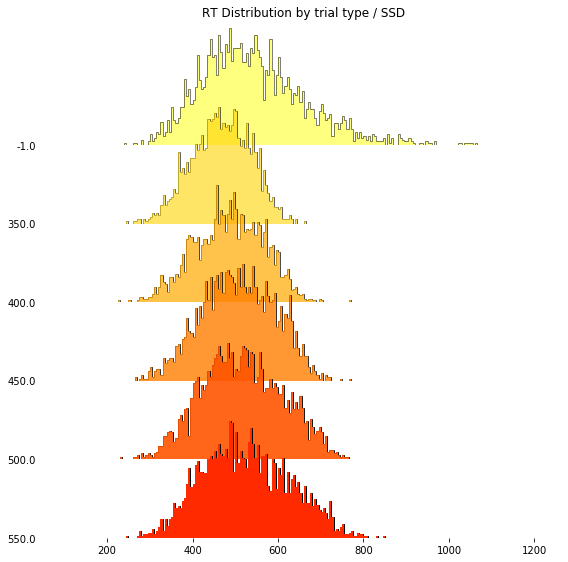

In [48]:
plot_RTs_per_SSD(sim_data)

In [49]:
tst = None

if tst:
    print('hel')

# Simulate a group

In [26]:
NSUBS = 10
subjects = np.arange(0, NSUBS)

group_data = pd.DataFrame()
for subject in subjects:
    params = {
        'mu_go': np.random.normal(.25, scale=.03),
        'mu_stop': np.random.normal(.6, scale=.03),
        'n_trials': 100
    }
    data = simulator.simulate(params)
    data['ID'] = subject
    group_data = pd.concat([group_data, data], 0)

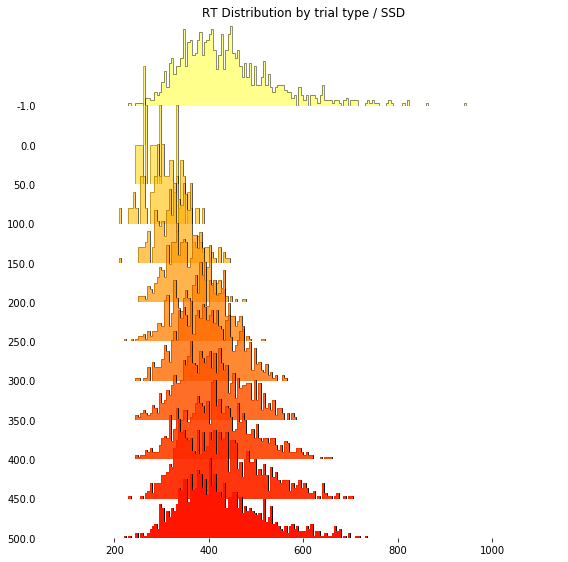

In [27]:
plot_RTs_per_SSD(group_data)